In [482]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [483]:
loan_data = pd.read_csv('loan_data_set.csv')
loan_data_original = loan_data.copy()
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [484]:
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train['Loan_Status'] = y_train
train_data = X_train.copy()
test_data = X_test.copy()

In [485]:
train_data_original = train_data.copy()
test_data_original = test_data.copy()

In [486]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [487]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [488]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [489]:
train_data.shape, test_data.shape

((429, 13), (185, 12))

In [490]:
train_data['Loan_Status'].value_counts()

Loan_Status
Y    302
N    127
Name: count, dtype: int64

In [491]:
train_data['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.703963
N    0.296037
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

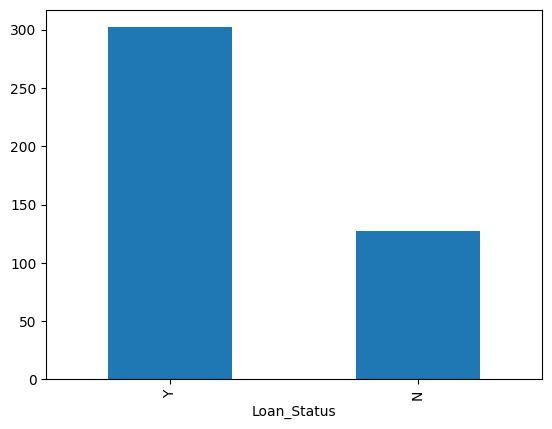

In [492]:
train_data['Loan_Status'].value_counts().plot.bar()

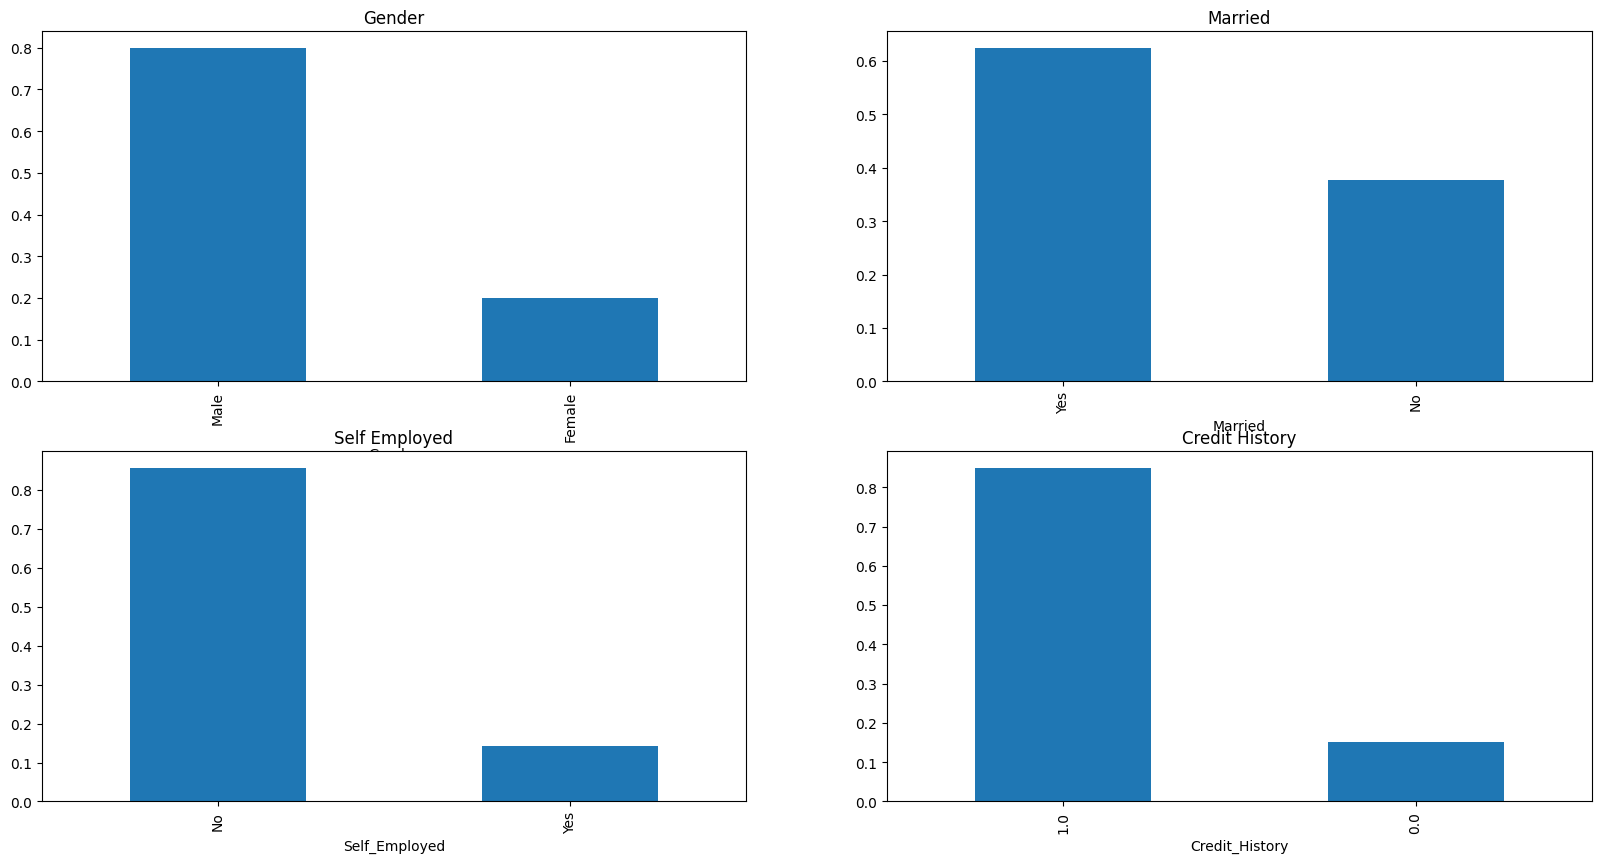

In [493]:
plt.figure(1)
plt.subplot(221)
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20, 10), title='Gender')
plt.subplot(222)
train_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(224)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.show()

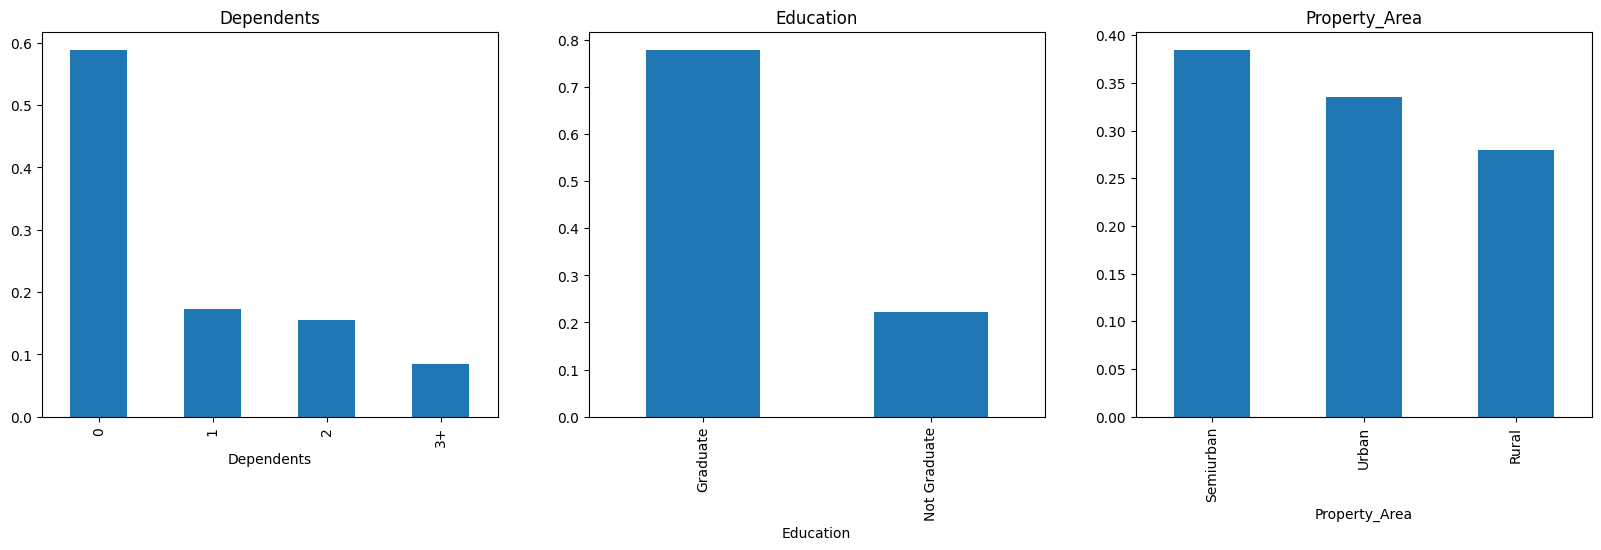

In [494]:
plt.figure(1)
plt.subplot(131)
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20, 5), title='Dependents')
plt.subplot(132)
train_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()


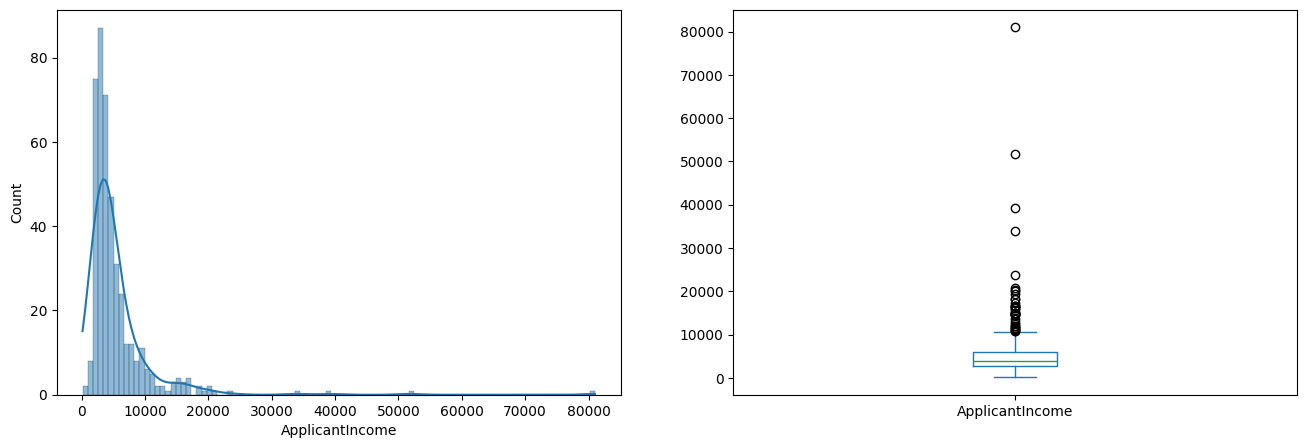

In [495]:
plt.figure(1)
plt.subplot(121)
sns.histplot(train_data['ApplicantIncome'],kde=True)
plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize=(16, 5))
plt.show()

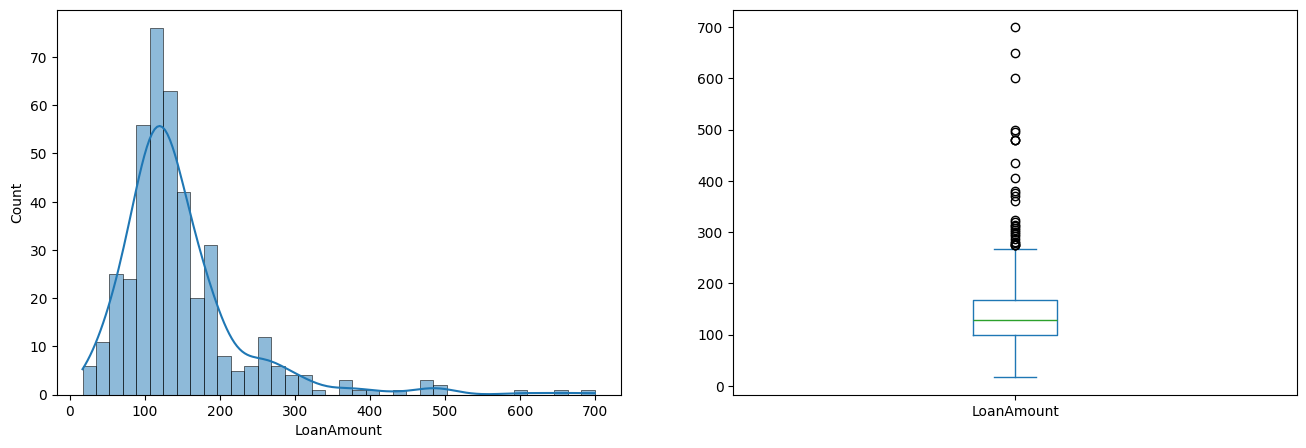

In [496]:
plt.figure(1)
plt.subplot(121)
df = train_data.dropna()
sns.histplot(train_data['LoanAmount'], kde=True)
plt.subplot(122)
train_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

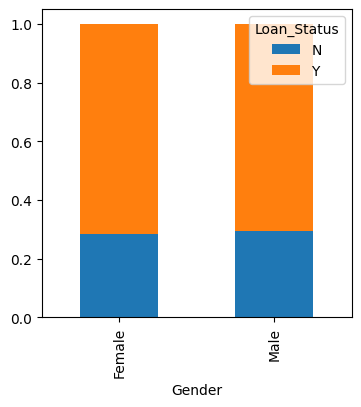

In [497]:
Gender = pd.crosstab(train_data['Gender'], train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

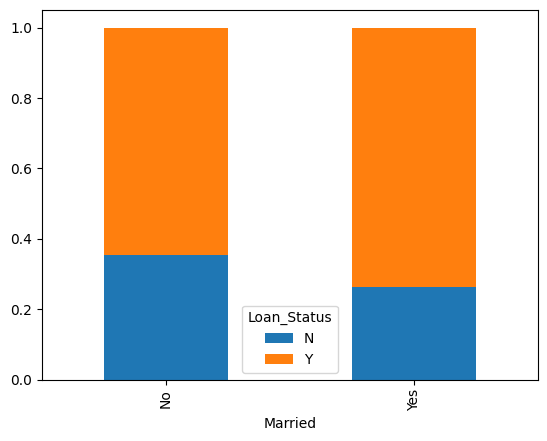

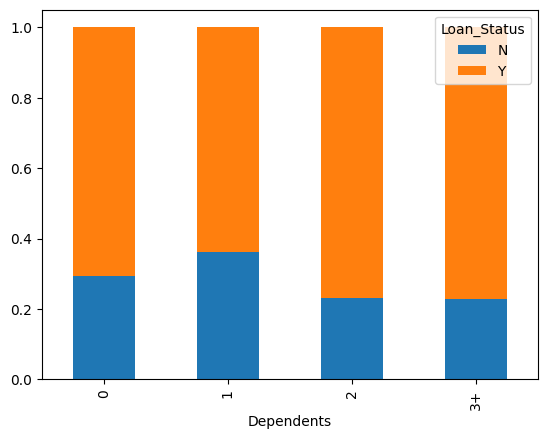

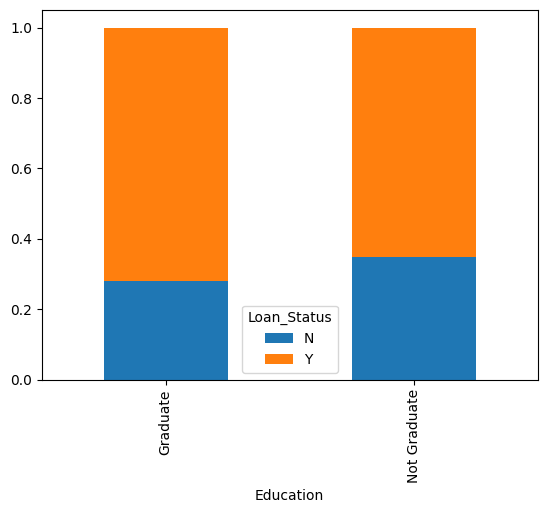

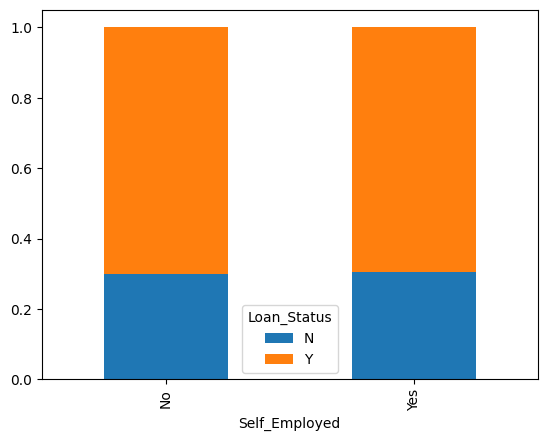

In [498]:
Married = pd.crosstab(train_data['Married'], train_data['Loan_Status'])
Dependents = pd.crosstab(train_data['Dependents'], train_data['Loan_Status'])
Education = pd.crosstab(train_data['Education'], train_data['Loan_Status'])
Self_Employed = pd.crosstab(train_data['Self_Employed'], train_data['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

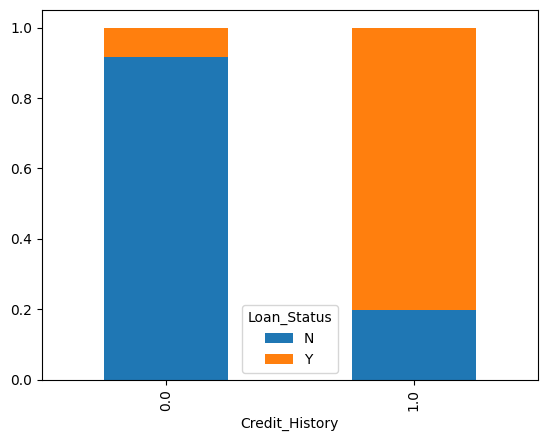

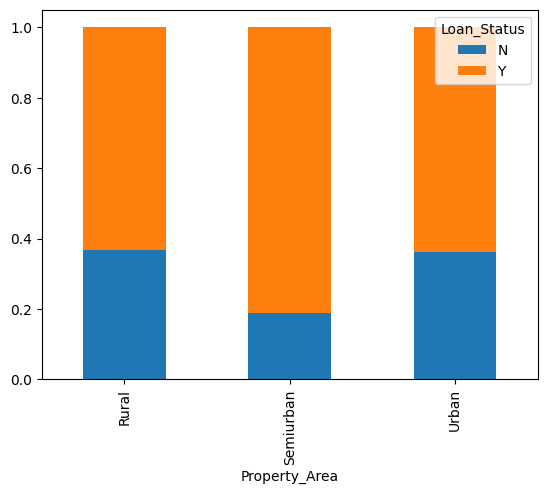

In [499]:
Credit_History = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
Property_Area = pd.crosstab(train_data['Property_Area'], train_data['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

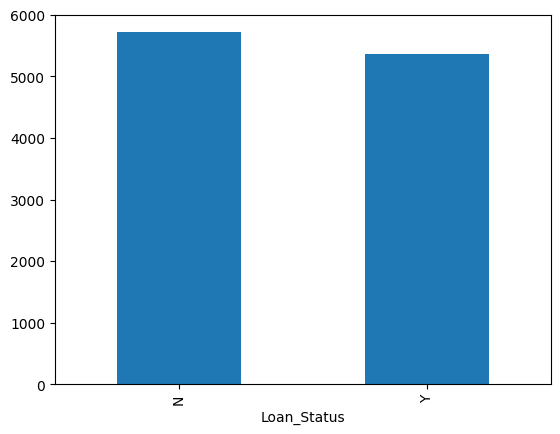

In [500]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')
plt.show()

In [501]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train_data['Income_bin']=pd.cut(train_data['ApplicantIncome'], bins, labels=group)

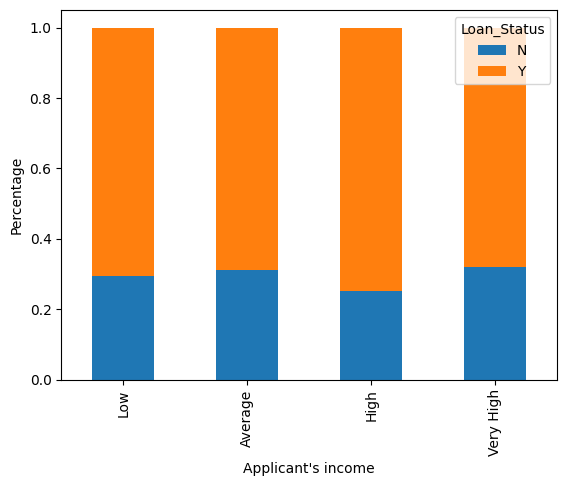

In [502]:
Income_bin=pd.crosstab(train_data['Income_bin'], train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel("Applicant's income")
plt.ylabel('Percentage')
plt.show()

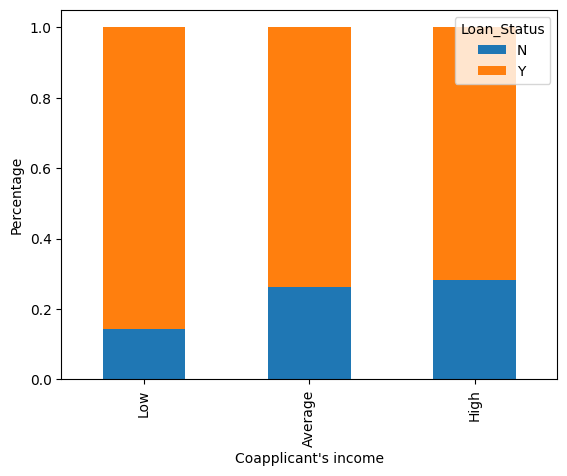

In [503]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train_data['Coapplicant_Income_bin'] = pd.cut(train_data['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(train_data['Coapplicant_Income_bin'], train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel("Coapplicant's income")
plt.ylabel('Percentage')
plt.show()

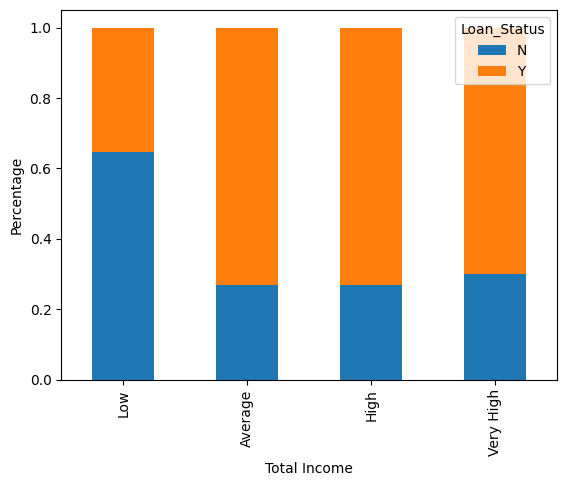

In [504]:
train_data['Total_Income'] = train_data['ApplicantIncome']+train_data['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']

train_data['Total_Income_bin'] = pd.cut(train_data['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(train_data['Total_Income_bin'], train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.show()

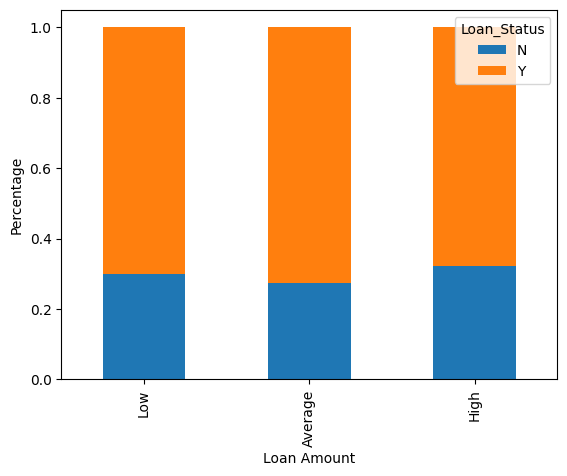

In [505]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train_data['LoanAmount_bin'] = pd.cut(train_data['LoanAmount'], bins, labels=group)
LoanAmount_bin = pd.crosstab(train_data['LoanAmount_bin'], train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

In [506]:
train_data = train_data.drop(['LoanAmount_bin', 'Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train_data['Dependents'].replace('3+', 3, inplace=True)
test_data['Dependents'].replace('3+', 3, inplace=True)
train_data['Loan_Status'].replace('N', 0, inplace=True)
train_data['Loan_Status'].replace('Y', 1, inplace=True)

In [507]:
train_data_num = train_data.drop(['Loan_ID', 'Gender', 'Married', 'Property_Area', 'Self_Employed', 'Education'], axis=1)

<Axes: >

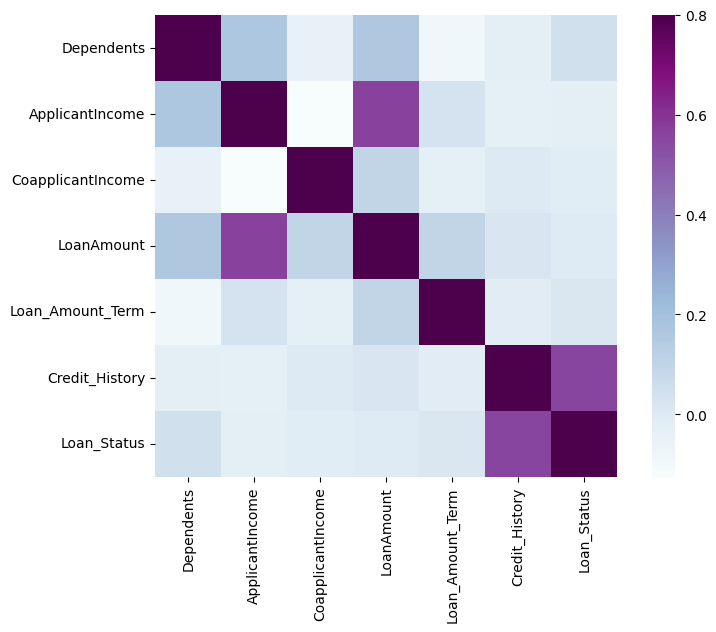

In [508]:
matrix = train_data_num.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='BuPu')

In [509]:
train_data.isnull().sum()

Loan_ID               0
Gender               11
Married               1
Dependents           11
Education             0
Self_Employed        18
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     11
Credit_History       32
Property_Area         0
Loan_Status           0
dtype: int64

In [510]:
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [511]:
train_data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    350
180.0     35
300.0     10
480.0     10
84.0       3
120.0      3
240.0      3
36.0       2
12.0       1
60.0       1
Name: count, dtype: int64

In [512]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [513]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [514]:
test_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
test_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

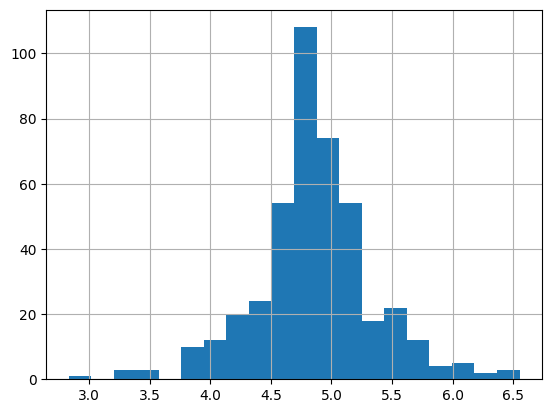

In [515]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

In [516]:
train_data = train_data.drop('Loan_ID', axis=1)
test_data = test_data.drop('Loan_ID', axis=1)

In [517]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

In [518]:
X = pd.get_dummies(X)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [519]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

In [520]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [521]:
pred_cv = model.predict(X_cv)
print(accuracy_score(y_cv, pred_cv))
print(f1_score(y_cv, pred_cv))

0.8217054263565892
0.8866995073891626


In [522]:
from sklearn.model_selection import StratifiedKFold
i = 1
mean = 0
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_i, test_i in kf.split(X, y):
    xtr, xvl = X.iloc[train_i], X.iloc[test_i]
    ytr, yvl = y.iloc[train_i], y.iloc[test_i]
    model = LogisticRegression()
    model.fit(xtr, ytr)
    pred_vl = model.predict(xvl)
    score = accuracy_score(yvl, pred_vl)
    mean += score
    print('{} of kfold {} accuracy_score {}'.format(i, kf.n_splits, score)) # type: ignore
    i+=1
    pred_test = model.predict(test_data)    
    pred = model.predict_proba(xvl)[:,1]

print('Mean score', mean/(i-1))    

1 of kfold 5 accuracy_score 0.7441860465116279
2 of kfold 5 accuracy_score 0.8023255813953488
3 of kfold 5 accuracy_score 0.8604651162790697
4 of kfold 5 accuracy_score 0.7790697674418605
5 of kfold 5 accuracy_score 0.788235294117647
Mean score 0.7948563611491107


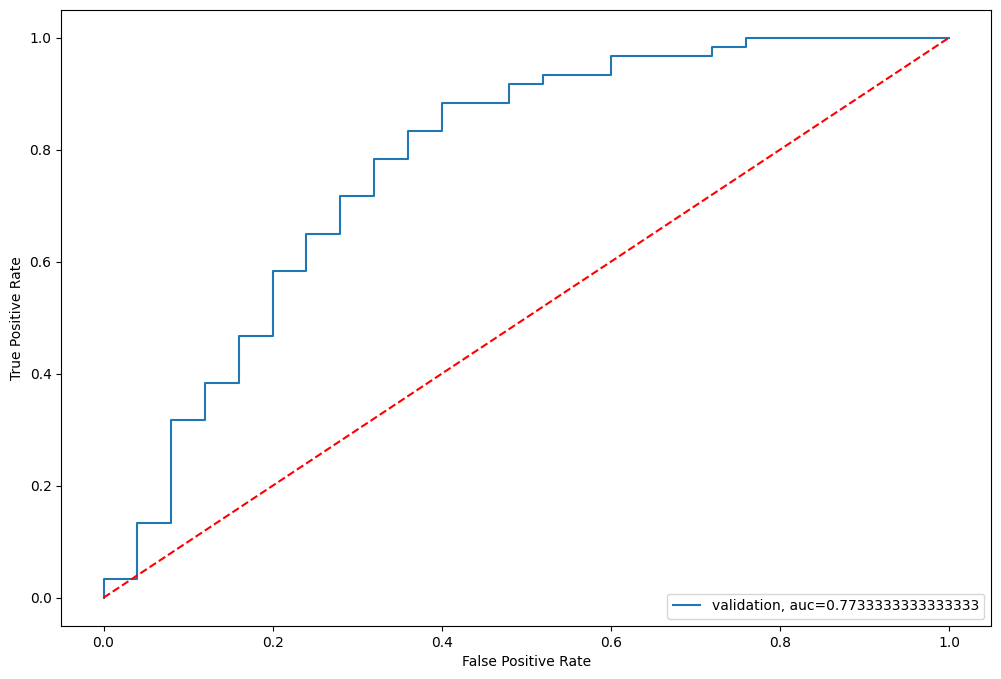

In [523]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4) 
plt.show()


<Axes: xlabel='Total_Income', ylabel='Density'>

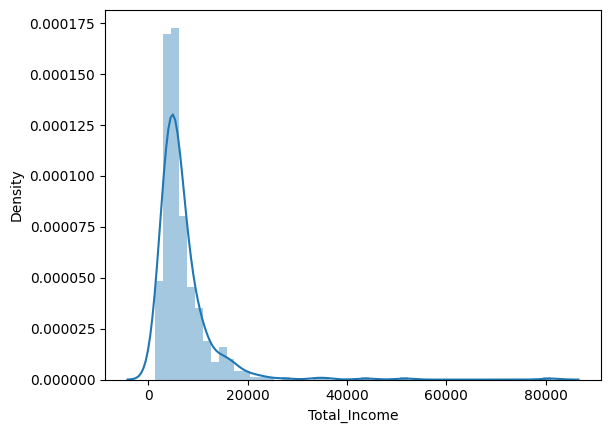

In [524]:
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

sns.distplot(train_data['Total_Income'])


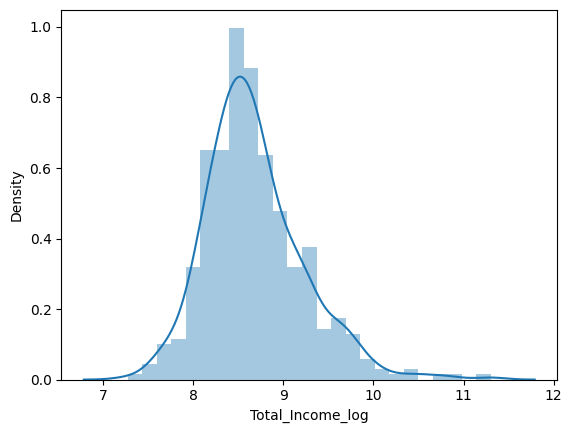

In [525]:
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
sns.distplot(train_data['Total_Income_log'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

<Axes: xlabel='EMI', ylabel='Density'>

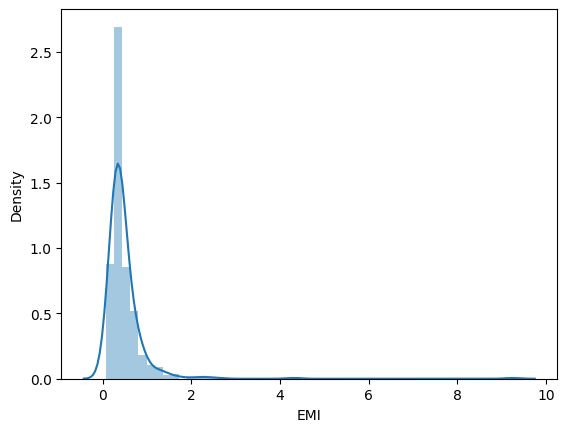

In [526]:
train_data['EMI'] = train_data['LoanAmount'] / train_data['Loan_Amount_Term']
test_data['EMI'] = test_data['LoanAmount'] / test_data['Loan_Amount_Term']
sns.distplot(train_data['EMI'])

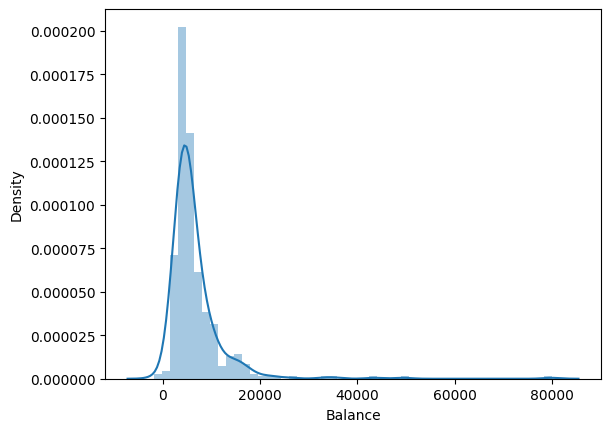

In [527]:
train_data['Balance'] = train_data['Total_Income'] - train_data['EMI']*1000
sns.distplot(train_data['Balance'])
test_data['Balance'] = test_data['Total_Income'] - test_data['EMI']*1000

In [528]:
train_data = train_data.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)
test_data = test_data.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)

In [529]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

Logistic Regression

In [530]:
i = 1
mean = 0
fmean = 0
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_i, test_i in kf.split(X, y):
    xtr, xvl = X.iloc[train_i], X.iloc[test_i]
    ytr, yvl = y.iloc[train_i], y.iloc[test_i]
    model = LogisticRegression()
    model.fit(xtr, ytr)
    pred_vl = model.predict(xvl)
    score = accuracy_score(yvl, pred_vl)
    f1score = f1_score(yvl, pred_vl)
    mean+=score
    fmean+=f1score
    print('{} of kfold {} accuracy_score {}'.format(i, kf.n_splits, score)) # type: ignore
    i+=1

    pred_test = model.predict(test_data)
    pred = model.predict_proba(xvl)[:, 1]

print('mean accuracy_score', mean/(i-1))
print('mean f1_score', fmean/(i-1))    

1 of kfold 5 accuracy_score 0.8023255813953488
2 of kfold 5 accuracy_score 0.8023255813953488
3 of kfold 5 accuracy_score 0.8604651162790697
4 of kfold 5 accuracy_score 0.8023255813953488
5 of kfold 5 accuracy_score 0.8117647058823529
mean accuracy_score 0.8158413132694939
mean f1_score 0.8815225591527289


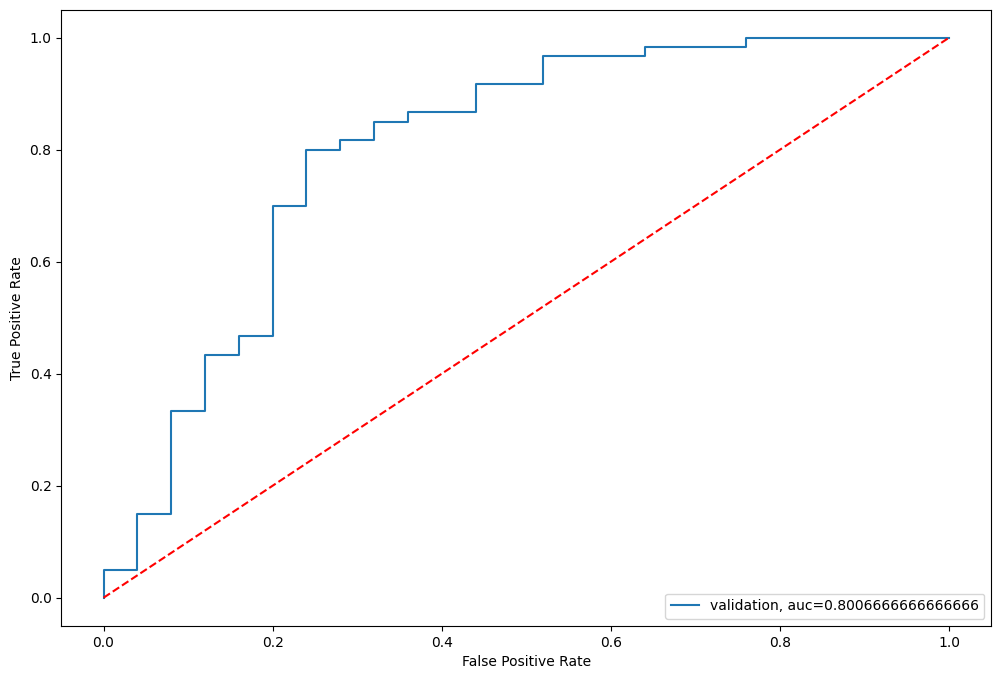

In [531]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


<div>Decision Tree</div>

In [532]:
from sklearn.tree import DecisionTreeClassifier

i = 1
mean = 0
fmean = 0
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_i, test_i in kf.split(X, y):
    xtr, xvl = X.iloc[train_i], X.iloc[test_i]
    ytr, yvl = y.iloc[train_i], y.iloc[test_i]
    model = DecisionTreeClassifier(random_state=42)
    model.fit(xtr, ytr)
    pred_vl = model.predict(xvl)
    score = accuracy_score(yvl, pred_vl)
    f1score = f1_score(yvl, pred_vl)
    mean+=score
    fmean+=f1score
    print('{} of kfold {} accuracy_score {}'.format(i, kf.n_splits, score)) # type: ignore
    i+=1

    pred_test = model.predict(test_data)
    pred = model.predict_proba(xvl)[:, 1] # type: ignore

print('mean accuracy_score', mean/(i-1))
print('mean f1_score', fmean/(i-1))    

1 of kfold 5 accuracy_score 0.7674418604651163
2 of kfold 5 accuracy_score 0.6511627906976745
3 of kfold 5 accuracy_score 0.6744186046511628
4 of kfold 5 accuracy_score 0.6976744186046512
5 of kfold 5 accuracy_score 0.7176470588235294
mean accuracy_score 0.7016689466484268
mean f1_score 0.7826378993194336


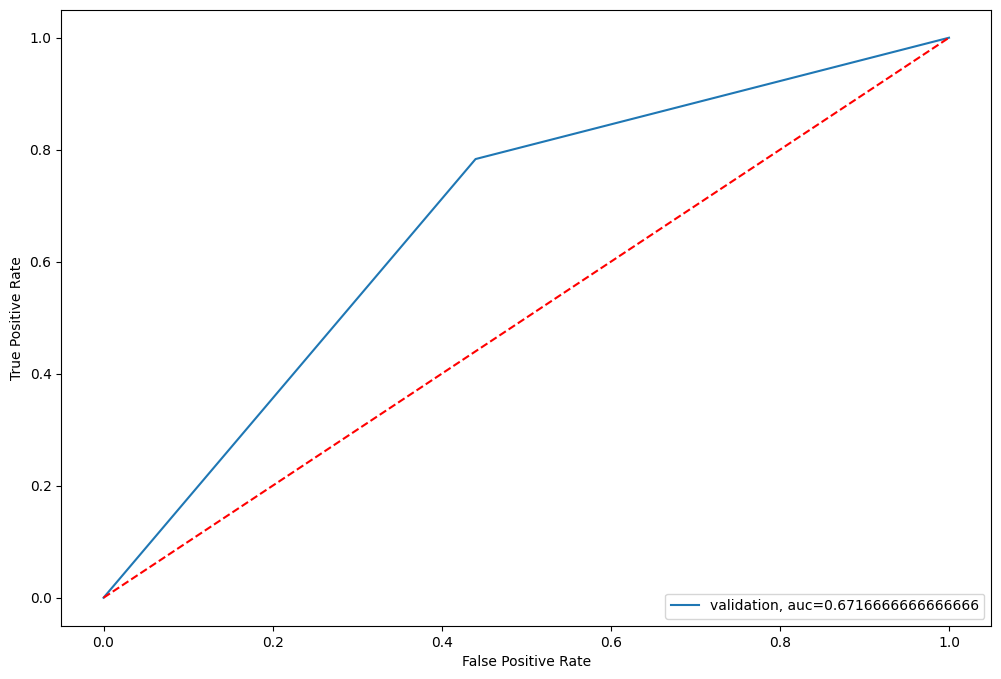

In [533]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()